# Assignment_Random_Forest_Fraud_dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

C:\Users\PRASAD\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [33]:
# Import Dataset
fraud=pd.read_csv('Fraud_check.csv')

In [34]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [35]:
fraud.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [36]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [37]:
fraud.shape

(600, 6)

In [38]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [39]:
fraud[fraud.duplicated()].shape

(0, 6)

In [40]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [41]:
fraud['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [42]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [43]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [0,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [0,30000,99620], labels = ["Risky", "Good"])

In [44]:
fraud.TaxInc.value_counts()

Good     476
Risky    124
Name: TaxInc, dtype: int64

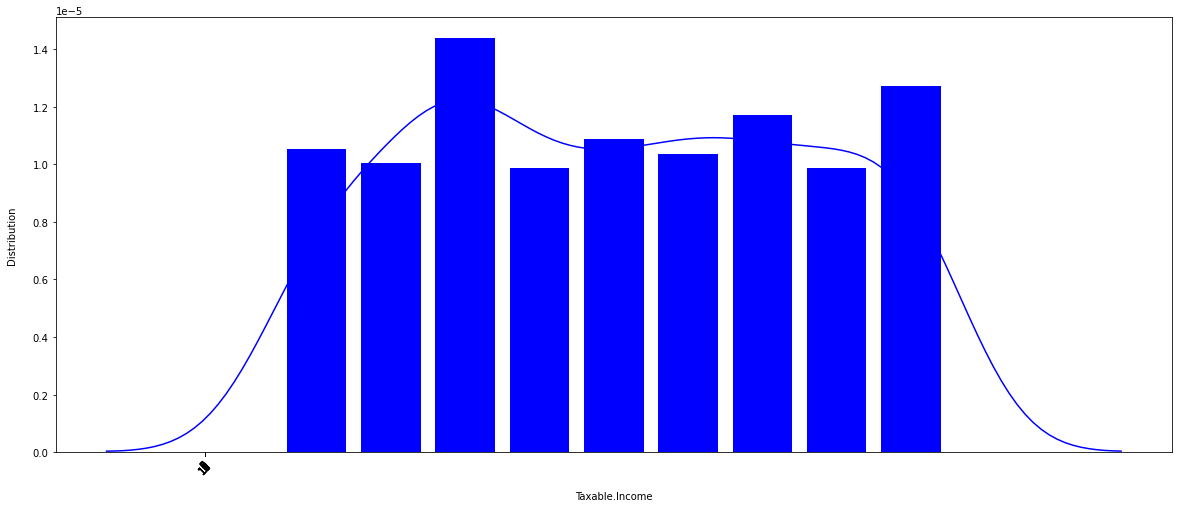

In [45]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(fraud[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")

In [8]:
#After creation of new col. TaxInc also made its dummies var concating right side of fraud
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [9]:
fraud.tail()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


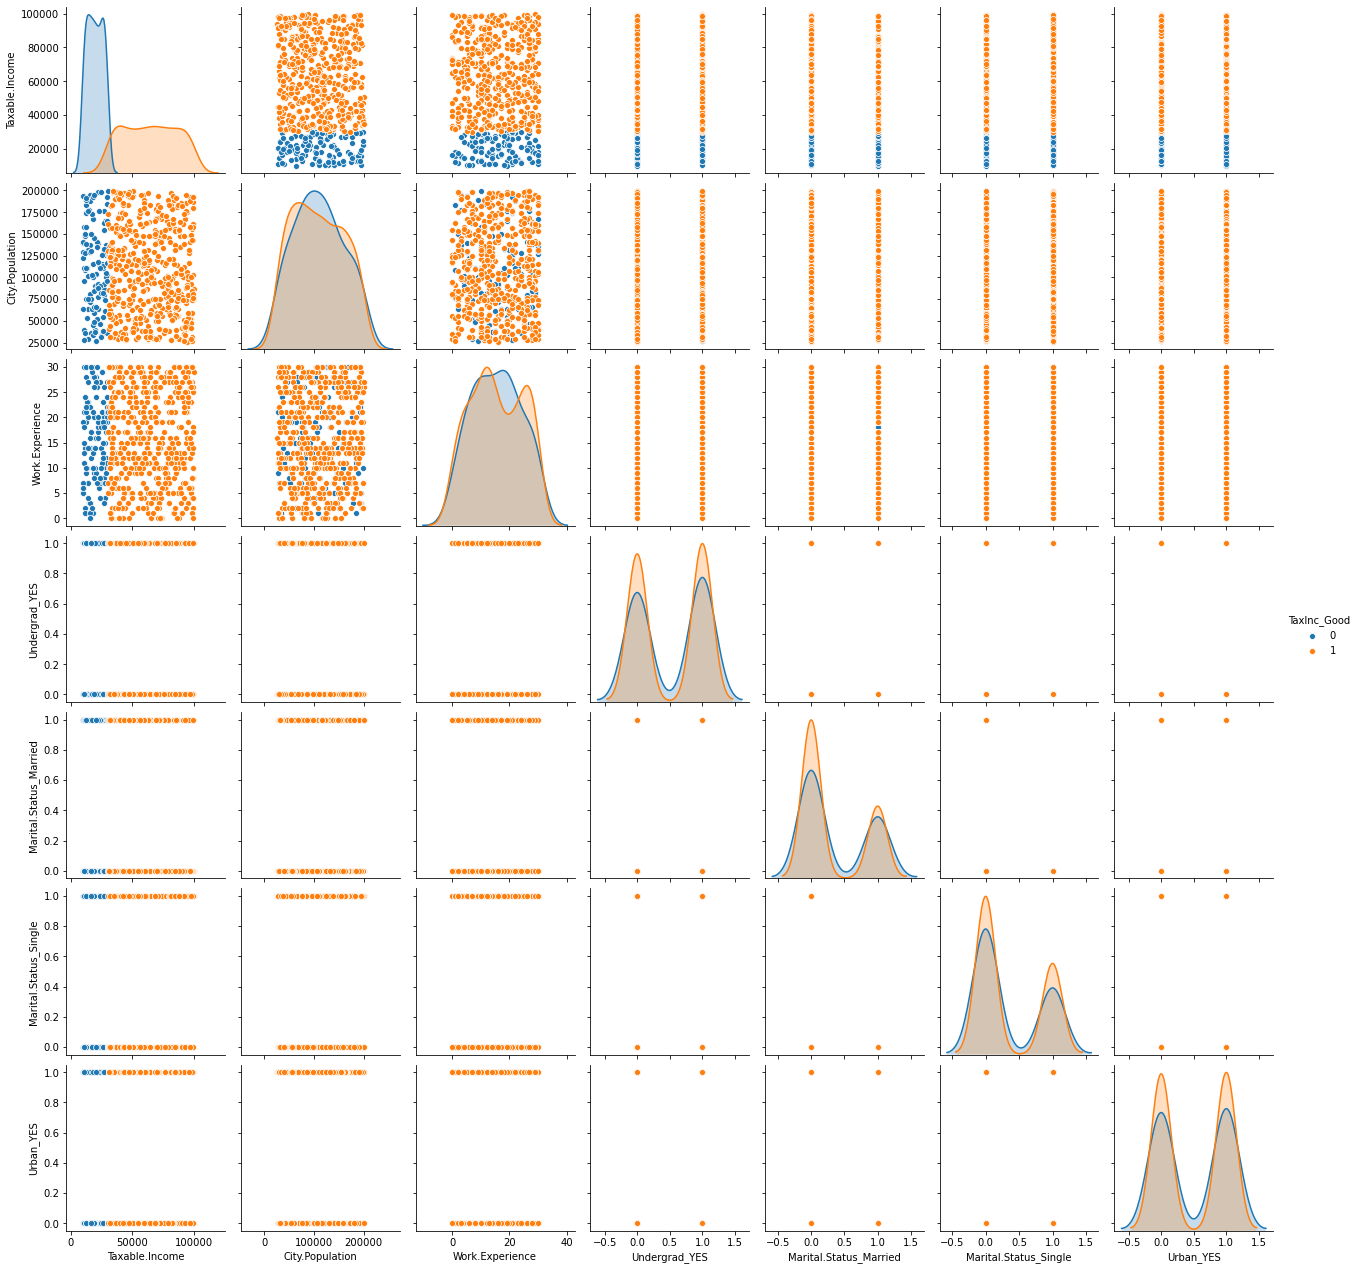

In [10]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud, hue = 'TaxInc_Good')

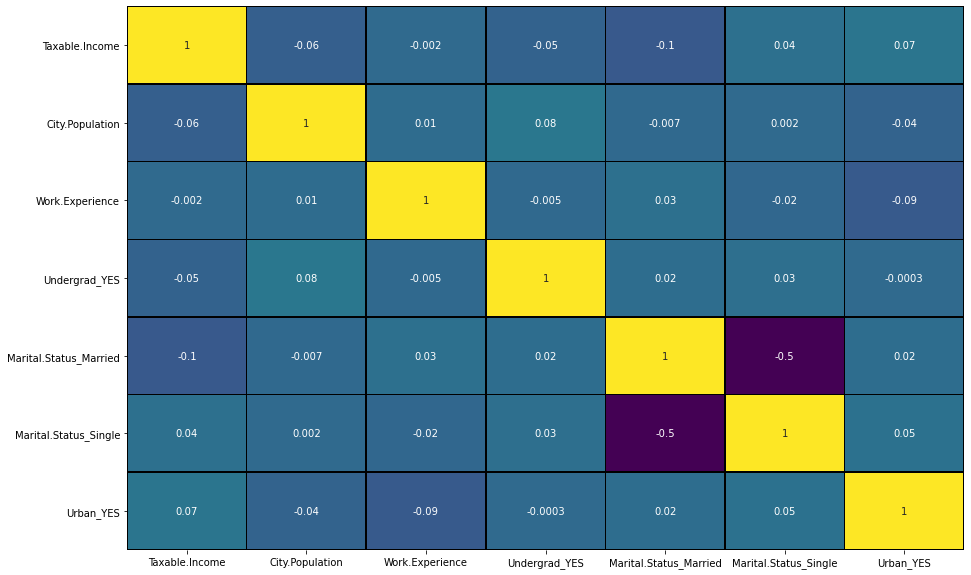

In [47]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(fraud.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [11]:
X = fraud.iloc[:,1:7]
Y = fraud.iloc[:,-1]

In [14]:
# Splitting data into train & test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)

In [52]:
print("Shape of X_train: ",Xtrain.shape)
print("Shape of X_test: ", Xtest.shape)
print("Shape of y_train: ",Ytrain.shape)
print("Shape of y_test",Ytest.shape)

Shape of X_train:  (420, 6)
Shape of X_test:  (180, 6)
Shape of y_train:  (420,)
Shape of y_test (180,)


### Building model

In [49]:
model= RandomForestClassifier(n_estimators=200,
                              max_depth=20,min_samples_split=40,criterion='gini',oob_score=True)

In [50]:
model.fit(Xtrain,Ytrain)

RandomForestClassifier(max_depth=20, min_samples_split=40, n_estimators=200,
                       oob_score=True)

In [51]:
# checking the oob score
print('checking the oob score',model.oob_score_)

checking the oob score 0.8071428571428572


In [17]:
print('Train accuracy: {}'.format(model.score(Xtrain, Ytrain)))

Train accuracy: 0.8071428571428572


In [18]:
print('Test accuracy: {}'.format(model.score(Xtest, Ytest)))

Test accuracy: 0.7611111111111111


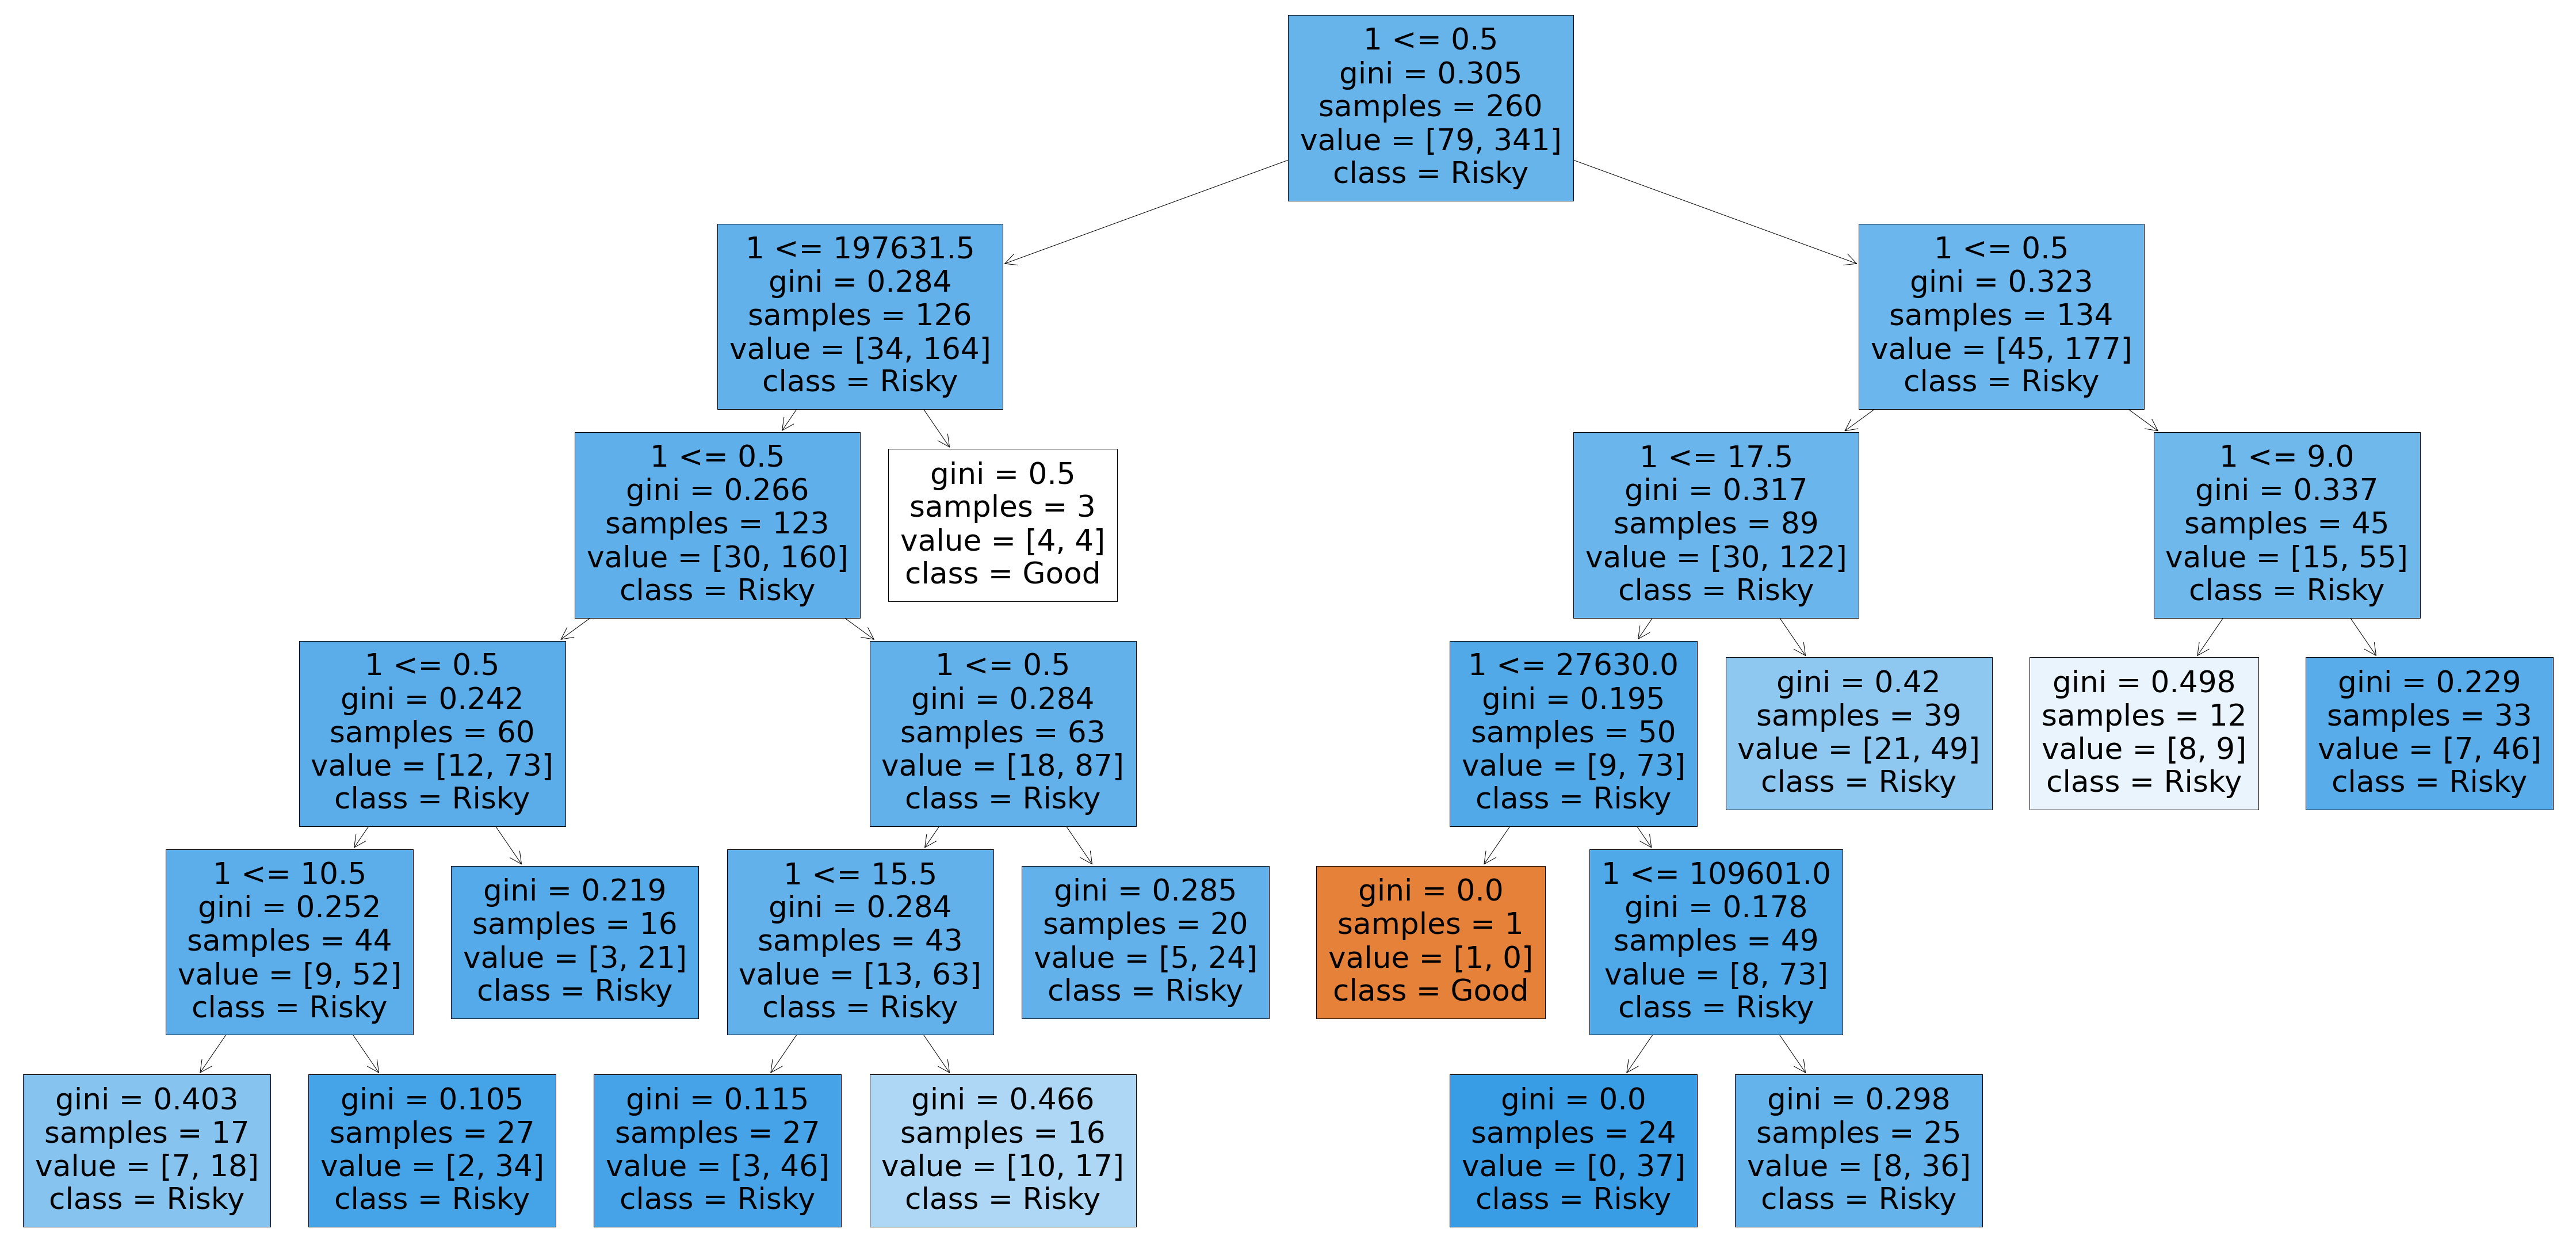

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(model.estimators_[190], feature_names = model.predict(Xtrain),class_names=fraud.TaxInc.unique(),filled=True)
plt.show()